# This is my data project
## this is smaller title
### this is even smaller
this is text

# Data Audit
Why was it collected?: Netflix
Who paid for it?: Netflix
Where did you get it from?: Netflix

`imports`, I've seen this before!

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from datetime import datetime
from collections import defaultdict

Some magic that tells jupyter to put graphs and things in the notebook instead of the default behaviour which is to save it as a file.

In [3]:
%matplotlib inline

Set the size of the plots that will come out when we ask for them. Annoyingly, these are in inches. Whatever an "inch" is

In [4]:
plt.rcParams["figure.figsize"] = (10, 5)


In [5]:
saved_style_state = matplotlib.rcParams.copy()  # give us a style state to go back to


The following checks to see if we've already downloaded the data. It's a big file, so we don't want to do it every time we run the code. Even just loading from file takes a few seconds!

Pandas is pretty smart, it can get data from the internet just as easily as from the file system, it just takes a bit longer.

In [6]:
if os.path.isfile("all-weeks-countries.csv"):
    filepath = "all-weeks-countries.csv"
    print("loading from file")
else:
    filepath = "https://www.kaggle.com/datasets/dhruvildave/netflix-top-10-tv-shows-and-films?resource=download&select=all-weeks-countries.csv"
    print("loading from the internet")

netflix_data = pd.read_csv(filepath)
print("done")


loading from file
done


In [7]:
netflix_data.iloc[0]

country_name                       Argentina
country_iso2                              AR
week                              2022-08-21
category                               Films
weekly_rank                                1
show_title                    Look Both Ways
season_title                             NaN
cumulative_weeks_in_top_10                 1
Name: 0, dtype: object

In [8]:
netflix_data.head() #gives the top 5 rows

country_name country_iso2        week category  weekly_rank  \
0    Argentina           AR  2022-08-21    Films            1   
1    Argentina           AR  2022-08-21    Films            2   
2    Argentina           AR  2022-08-21    Films            3   
3    Argentina           AR  2022-08-21    Films            4   
4    Argentina           AR  2022-08-21    Films            5   

                           show_title season_title  cumulative_weeks_in_top_10  
0                      Look Both Ways          NaN                           1  
1                           Day Shift          NaN                           2  
2  Bank Robbers: The Last Great Heist          NaN                           2  
3                   The Next 365 Days          NaN                           1  
4             The Angry Birds Movie 2          NaN                           1

The .value_counts() will create a series, where (using below as an example), index is the show name and value is the numerical value assigned ot the show name

In [9]:
count_of_shows=netflix_data["show_title"].value_counts() 
count_of_shows

show_title
Stranger Things                           3119
The Good Doctor                           1759
Money Heist                               1642
Manifest                                  1482
Squid Game                                1202
                                          ... 
Zero Dark Thirty                             1
Son of the Mask                              1
Oprah + Viola: A Netflix Special Event       1
No Good Deed                                 1
Glitch                                       1
Name: count, Length: 3459, dtype: int64

<Axes: xlabel='show_title'>

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 47112 (\N{HANGUL SYLLABLE RE}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 46300 (\N{HANGUL SYLLABLE DEU}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 49800 (\N{HANGUL SYLLABLE SYU}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 51592 (\N{HANGUL SYLLABLE JEU}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47112 

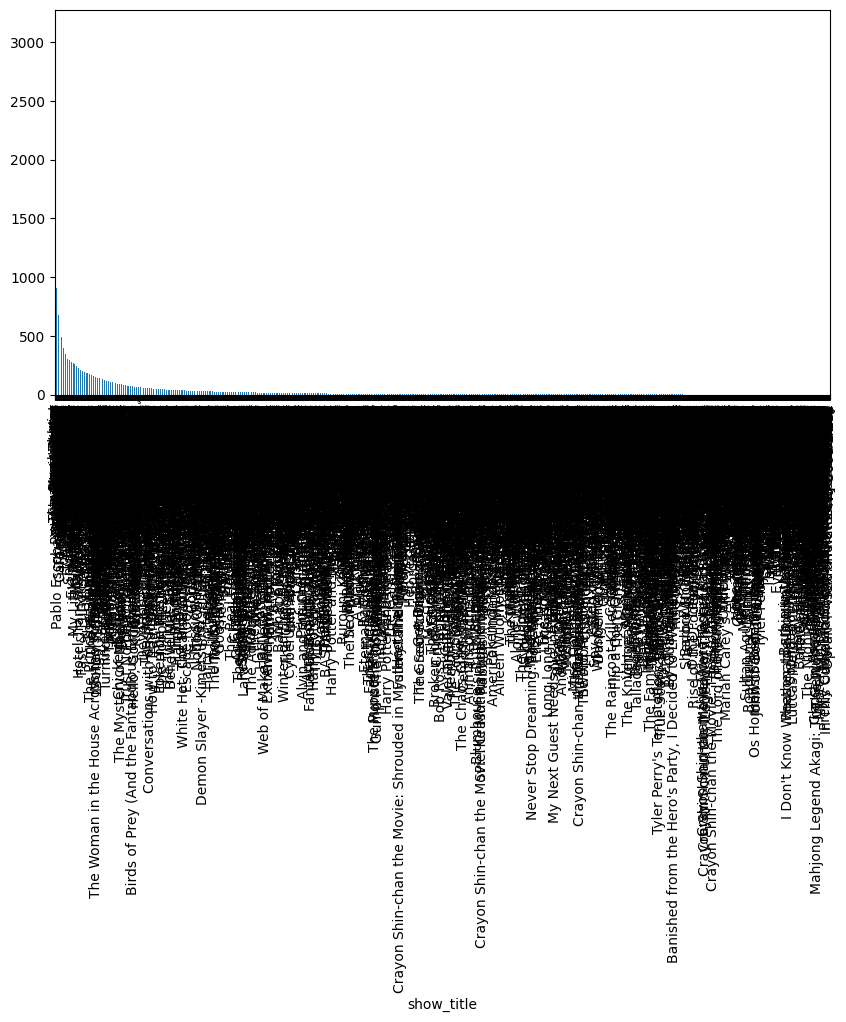

In [10]:
count_of_shows.plot(kind="bar")

the below only plots the tv shows that show up for a specific number of times

<Axes: ylabel='show_title'>

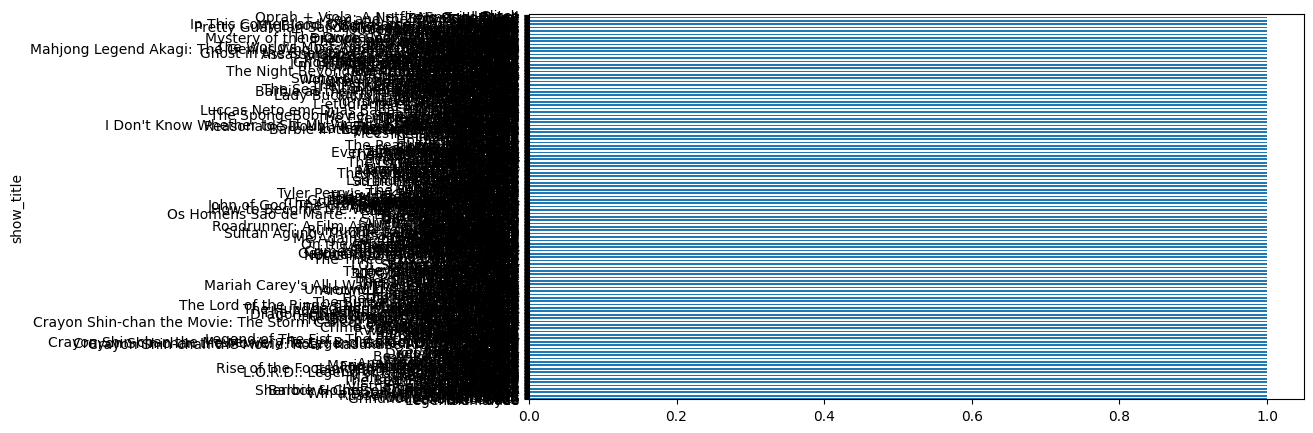

In [11]:
count_of_shows[count_of_shows ==1].plot(kind="barh")

the below code creates the same horizontal bar graph

<BarContainer object of 656 artists>

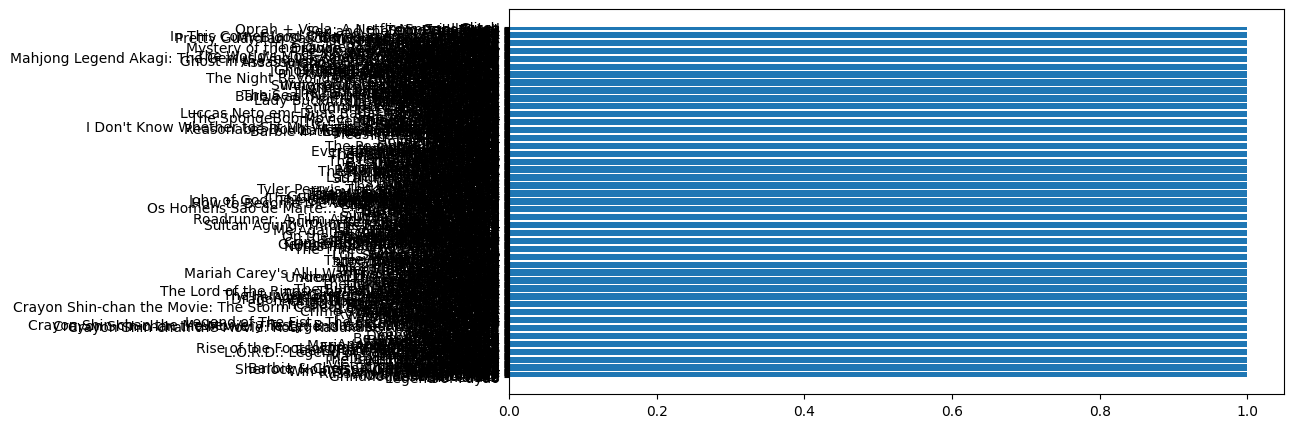

In [12]:
plt.barh(count_of_shows[count_of_shows==1].index,count_of_shows[count_of_shows==1].values)

The below kinda parses the dates so that the code recognises the date in the column "week"

In [13]:
netflix_data = pd.read_csv(
    filepath,
    infer_datetime_format=True,
    parse_dates=["week"],
)
netflix_data.head(2)


/var/folders/m6/9l2c43w54_dcl4z2zjrmxh940000gn/T/ipykernel_13575/3425564230.py:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  netflix_data = pd.read_csv(


country_name country_iso2       week category  weekly_rank      show_title  \
0    Argentina           AR 2022-08-21    Films            1  Look Both Ways   
1    Argentina           AR 2022-08-21    Films            2       Day Shift   

  season_title  cumulative_weeks_in_top_10  
0          NaN                           1  
1          NaN                           2

Then it finds the max and min date

In [14]:
first_date = netflix_data.week.min()
last_date = netflix_data.week.max()
f"range is: {first_date} to {last_date}"


'range is: 2021-07-04 00:00:00 to 2022-08-21 00:00:00'

This makes it much more readable 

In [15]:
date_format_pattern = "%B, %Y"
earliest_date = datetime.strftime(first_date, date_format_pattern)
latest_date = datetime.strftime(last_date, date_format_pattern)
f"range is: {earliest_date} to {latest_date}"

'range is: July, 2021 to August, 2022'

The below(first line) shows how to filter the data to make a graph

<BarContainer object of 40 artists>

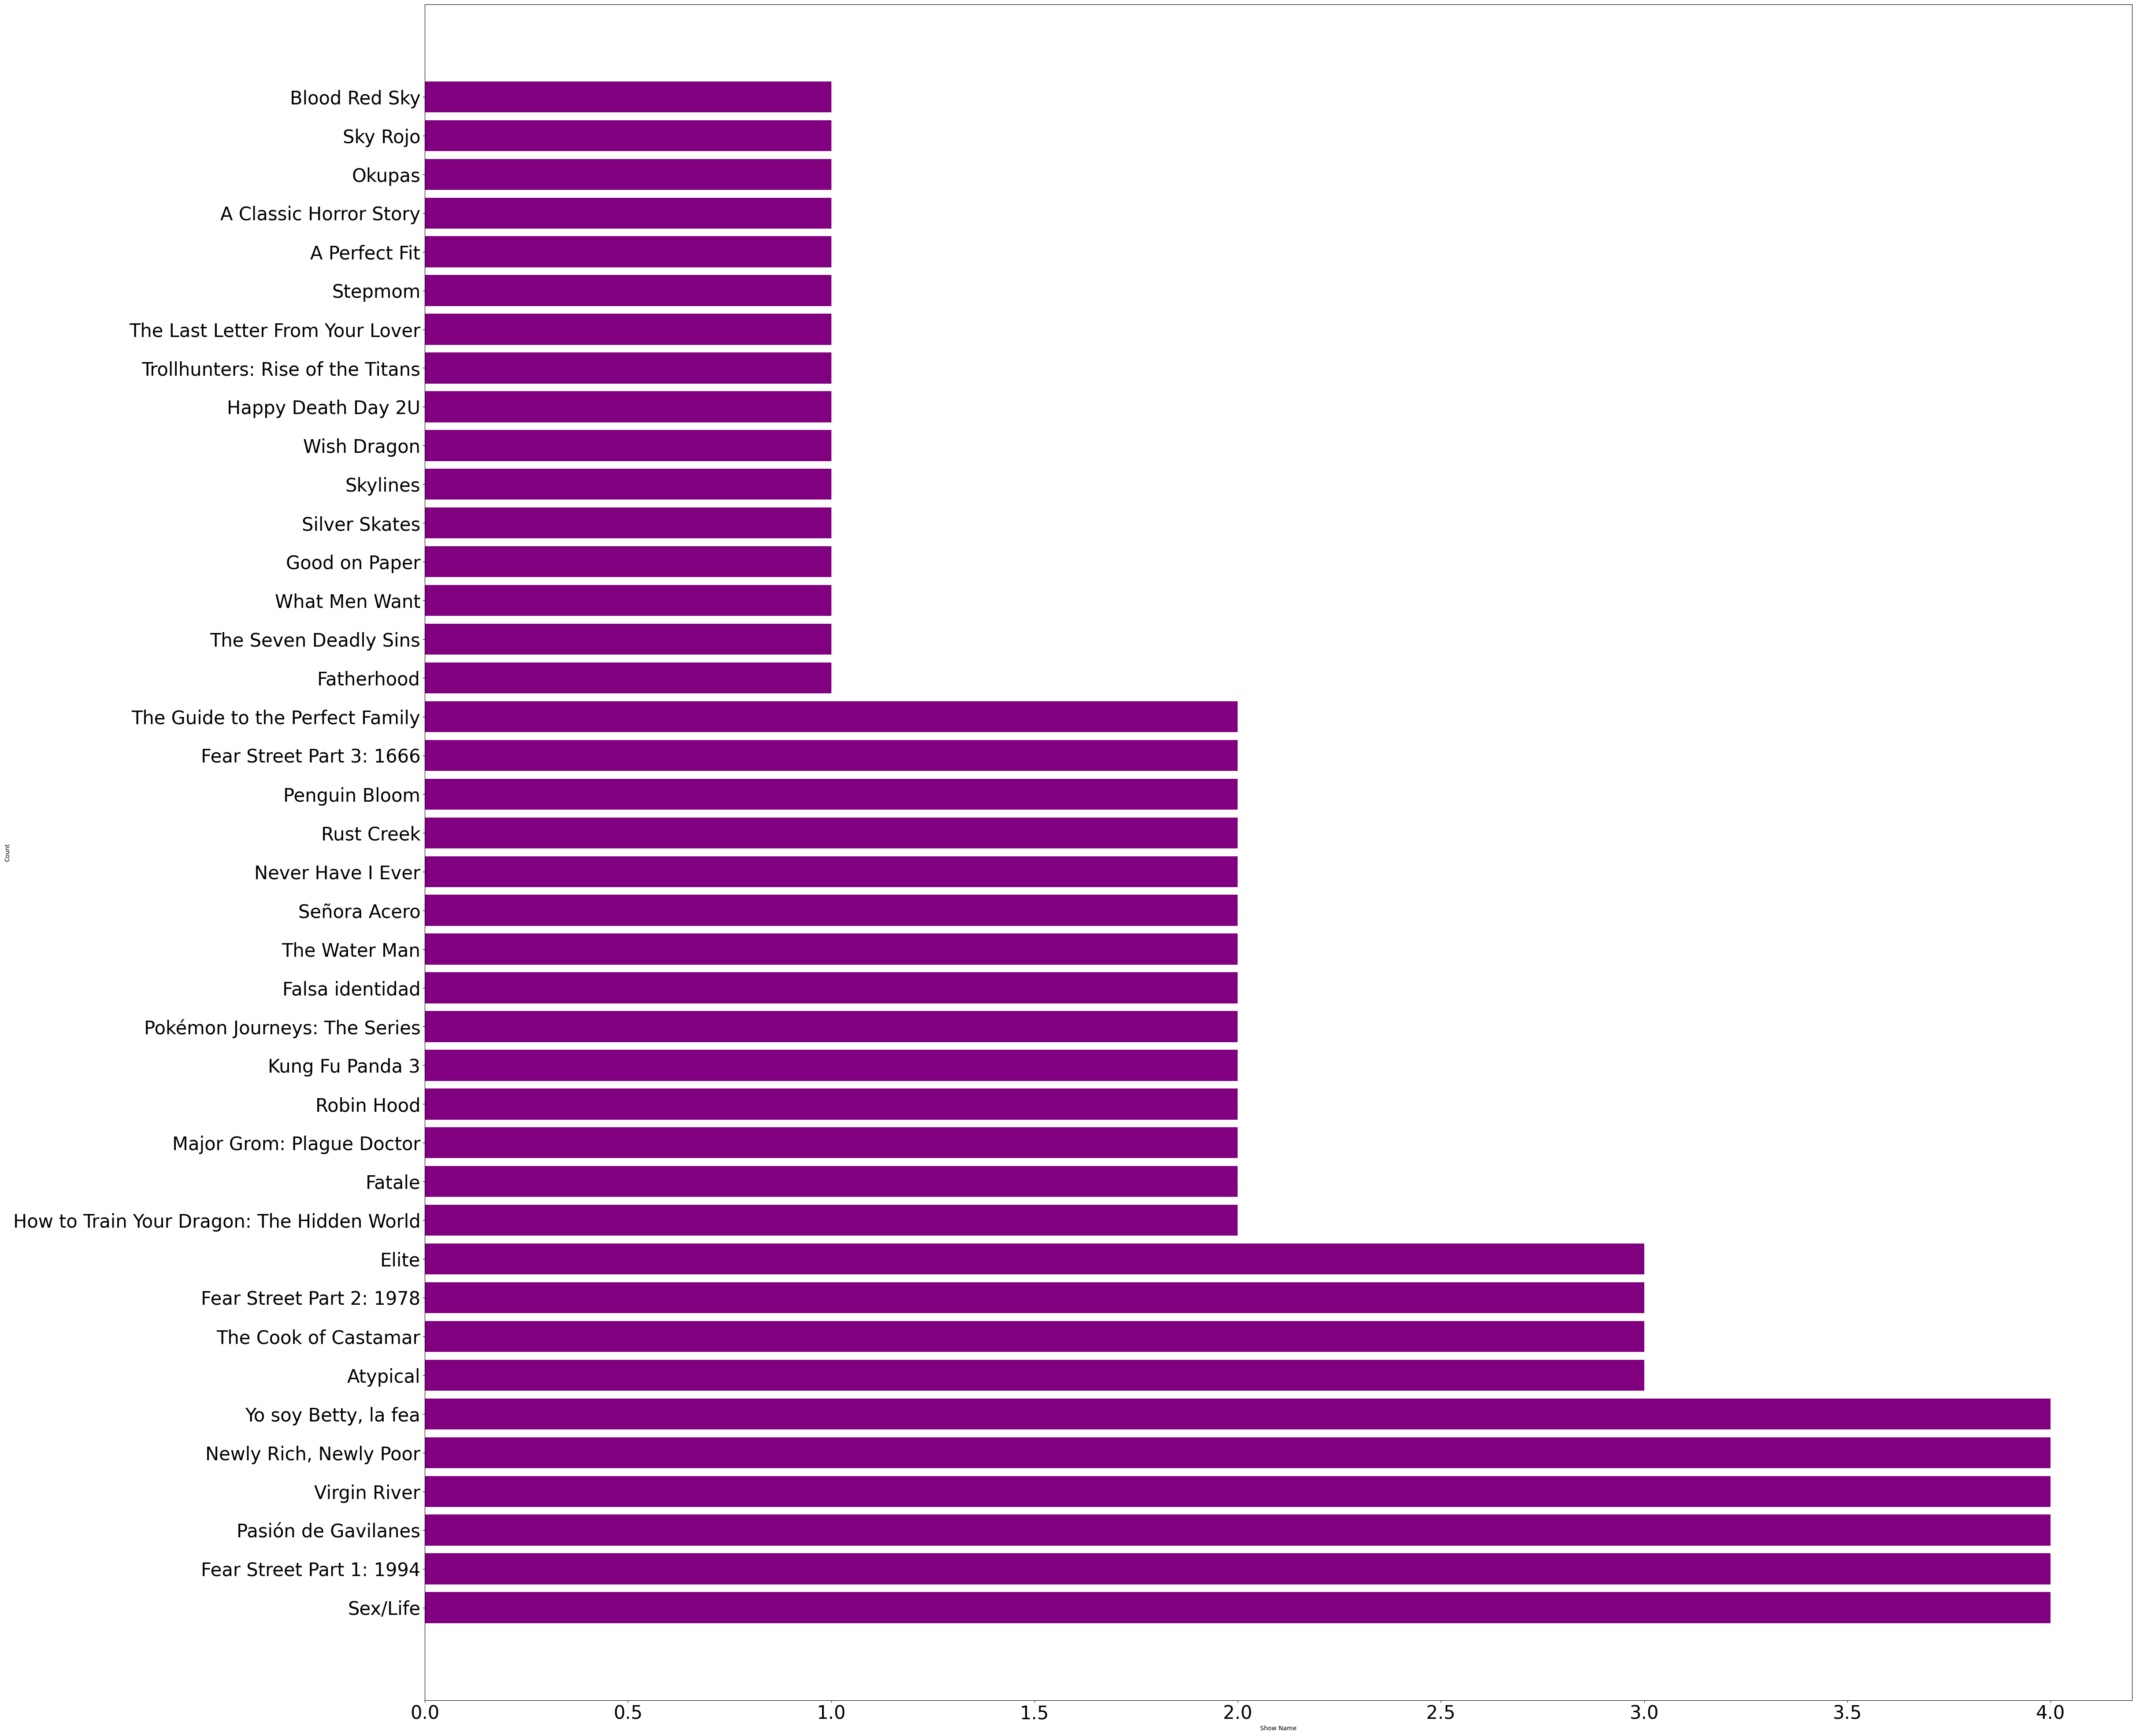

In [16]:
filtered_data = netflix_data[(netflix_data['week'] <="2021-07-30") & (netflix_data['week'] >="2021-07-04")&(netflix_data['country_name']=="Argentina")]
show_counts = filtered_data['show_title'].value_counts() 
plt.figure(figsize=(50, 50))
plt.xlabel('Show Name')
plt.ylabel('Count')
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)  
plt.barh(show_counts.index, show_counts.values, color='purple')

<BarContainer object of 45 artists>

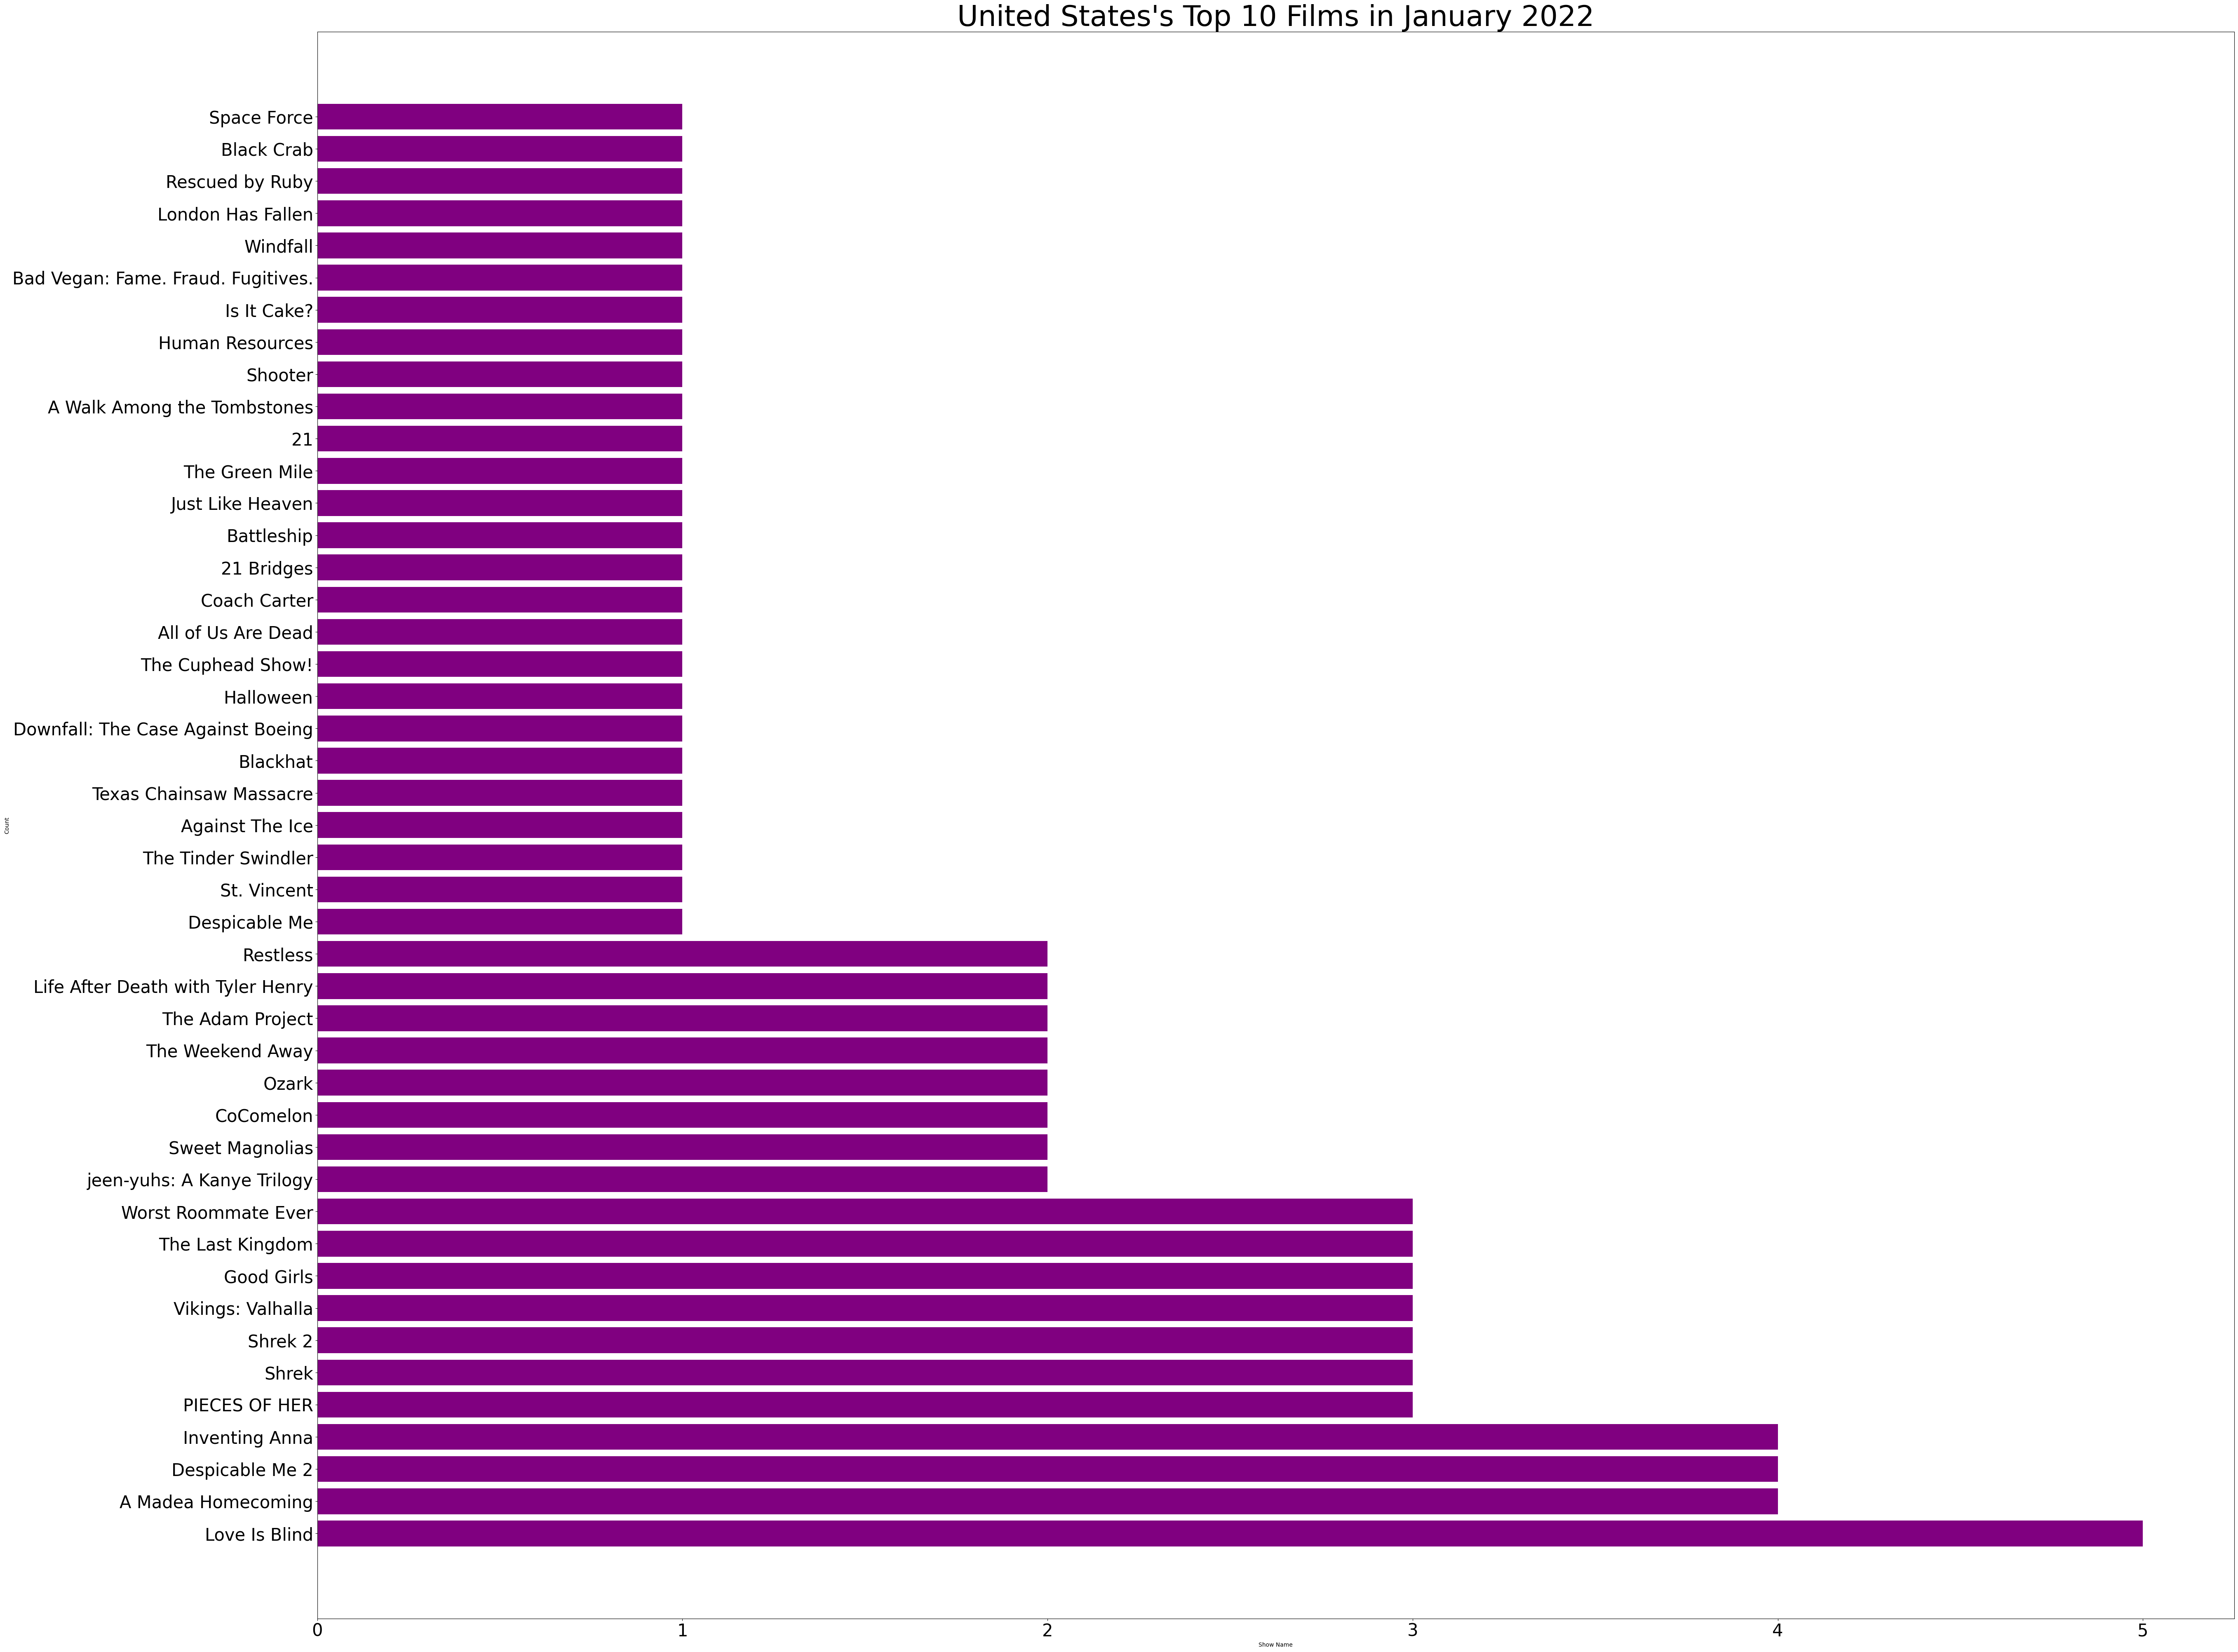

In [17]:
country= 'United States'
filtered_data = netflix_data[(netflix_data['week'] <"2022-03-27") & (netflix_data['week'] >="2022-02-27")&(netflix_data['country_name']==country)]
show_counts = filtered_data['show_title'].value_counts() 
plt.figure(figsize=(60, 50))
plt.xlabel('Show Name')
plt.ylabel('Count')
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.title(label=f"{country}'s Top 10 Films in January 2022", fontsize=50)  
plt.barh(show_counts.index, show_counts.values, color='purple')

<BarContainer object of 50 artists>

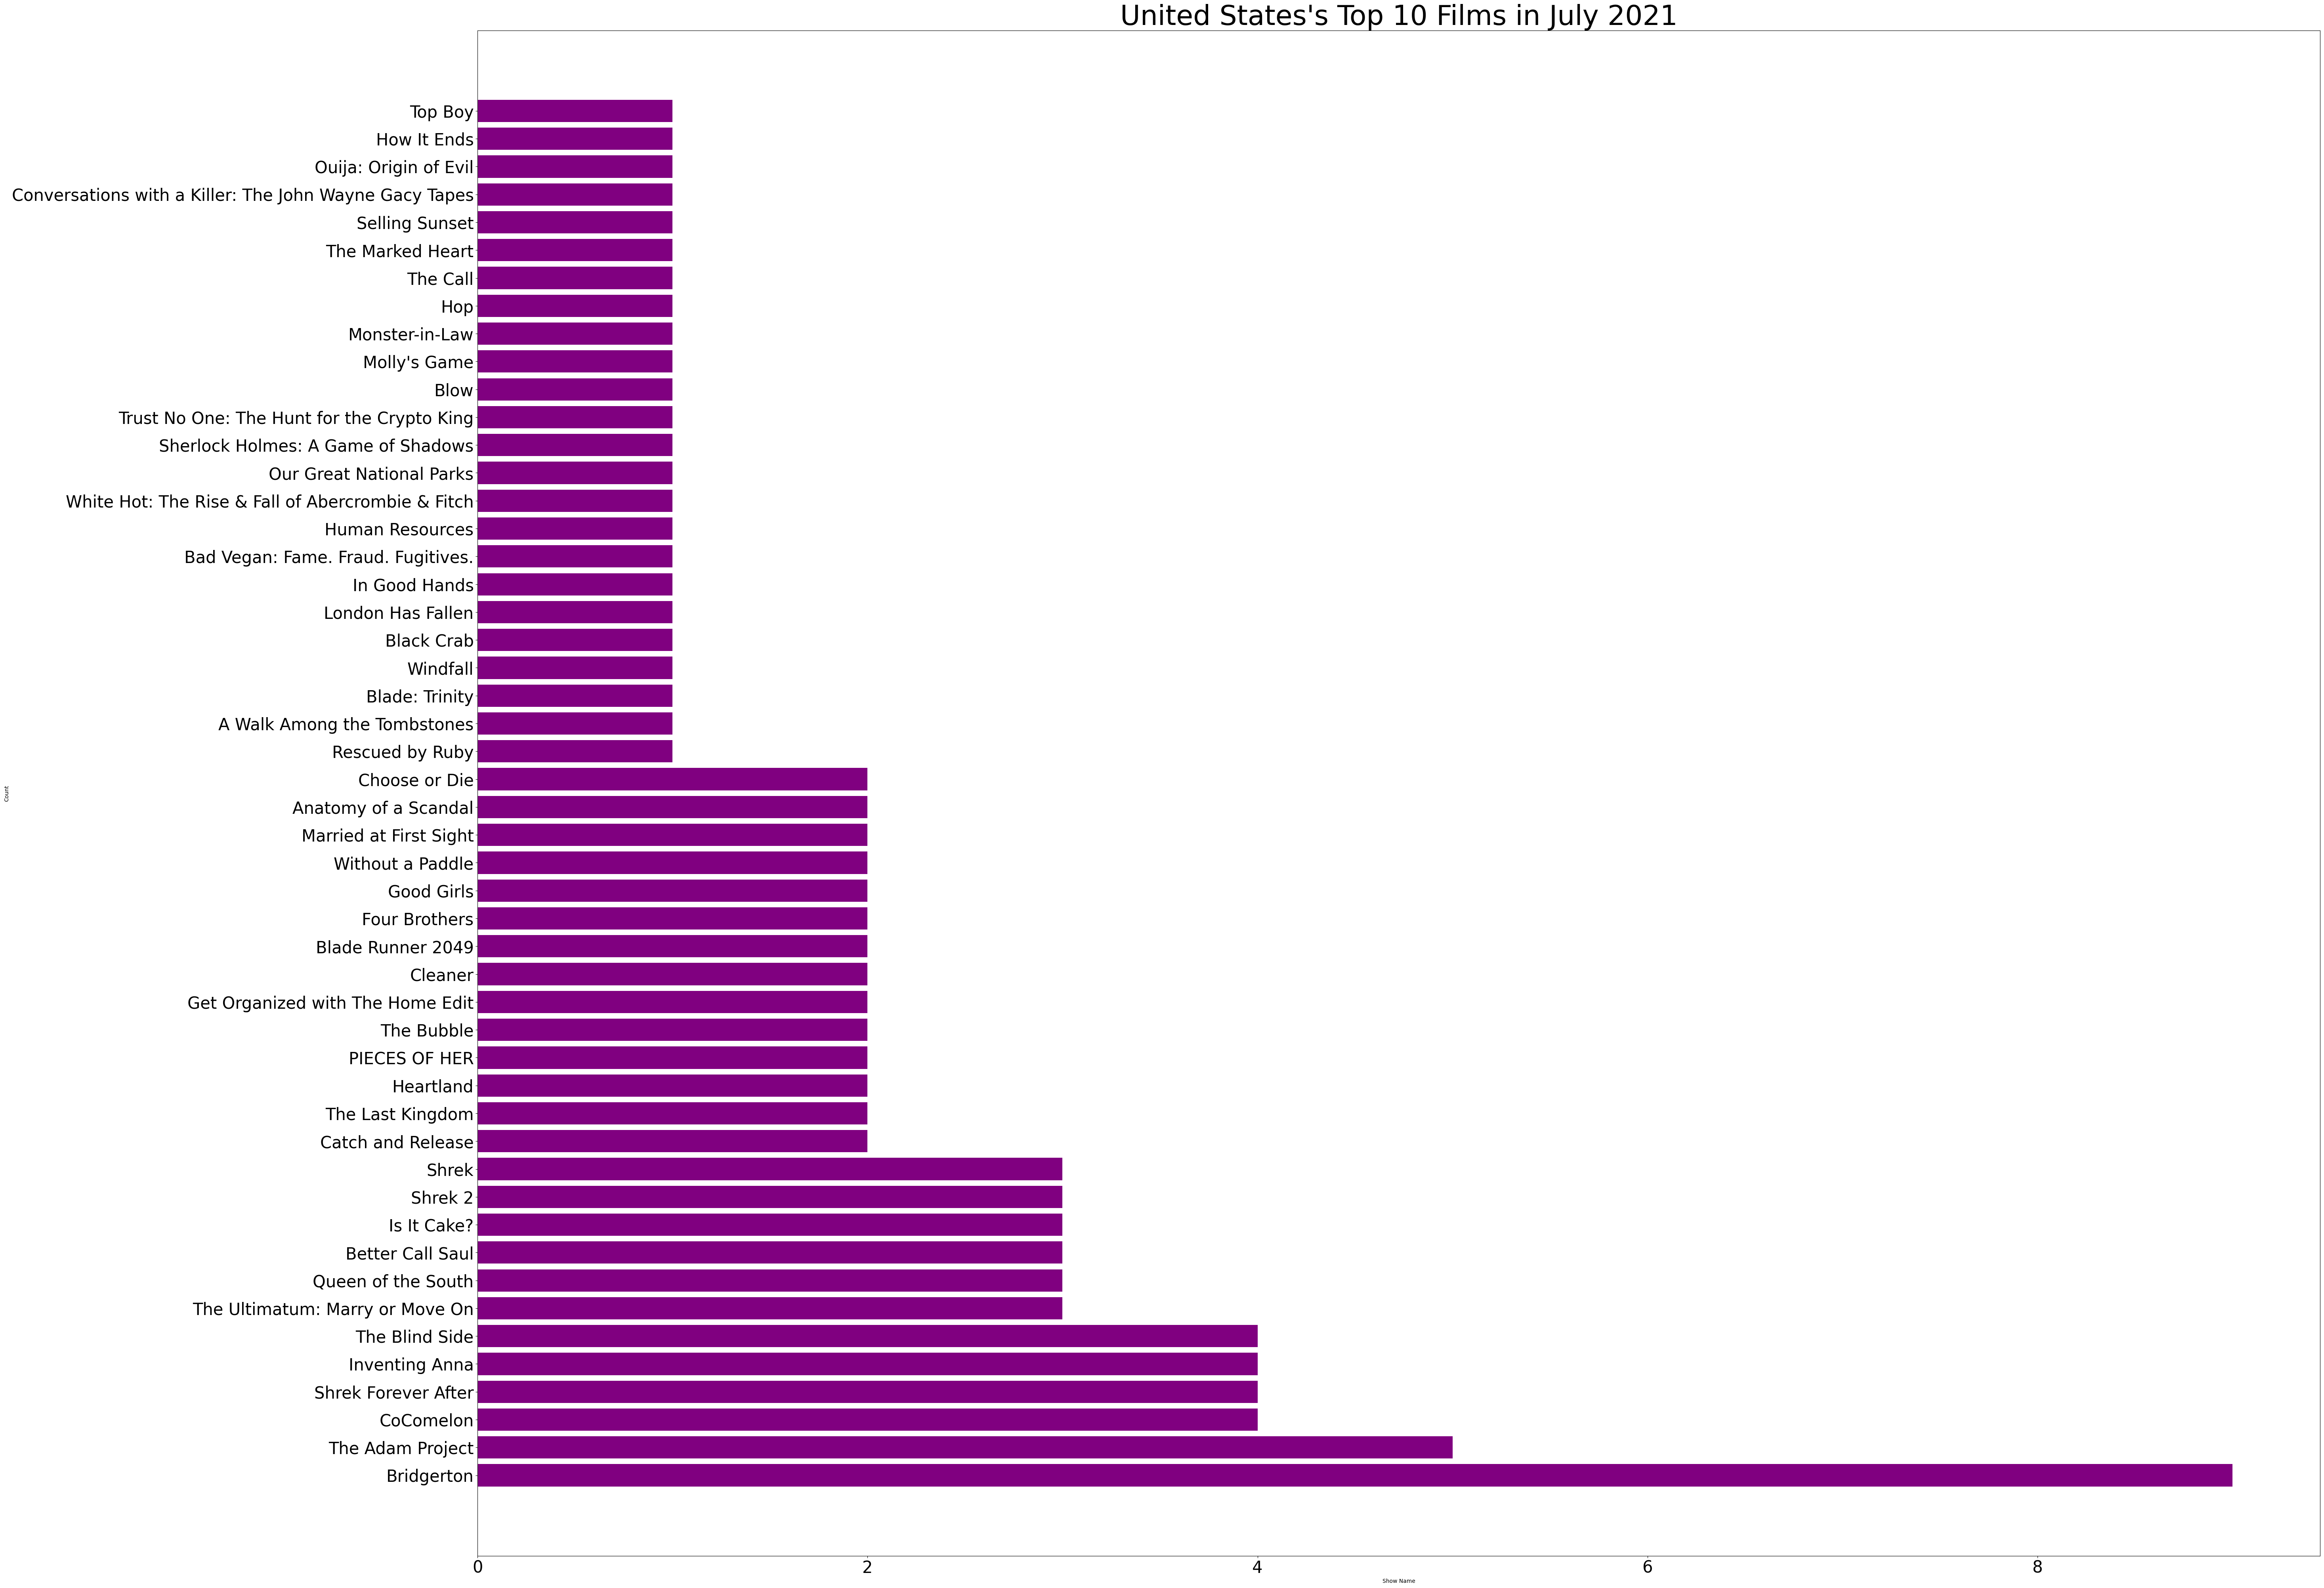

In [18]:
country= 'United States'
filtered_data = netflix_data[(netflix_data['week'] <="2022-04-27") & (netflix_data['week'] >="2022-03-27")&(netflix_data['country_name']==country)]
show_counts = filtered_data['show_title'].value_counts() 
plt.figure(figsize=(60, 50))
plt.xlabel('Show Name')
plt.ylabel('Count')
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.title(label=f"{country}'s Top 10 Films in July 2021", fontsize=50)  
plt.barh(show_counts.index, show_counts.values, color='purple')

# GROUPBY

In [68]:
for name, df in netflix_data.groupby("country_name"):
#netflix_data.groupby("country_name") creates a grouped object where netflix_data is split into groups based on unique values in the "country_name" column.
#The for name, df in ... part iterates over each group produced by groupby("country_name").
# name represents the unique value from the "country_name" column that defines the current group.
# df represents only the rows where "country_name" matches name.
    popular=df[df.cumulative_weeks_in_top_10>=52] #filters the dataframe to select rows where the "cumulative_weeks_in_top_10" column has values greater than 45.
    if popular.shape[0]: #shape[0] gives the number of rows, in this context it checks if popular has any rows
        titles = popular.show_title.unique() #Retrieves unique values from the 'show_title' column of the popular DataFrame.
        print(name, df.shape, titles, len(titles))
        #df.shape: Shape of the original DataFrame subset (df), which includes the number of rows and columns.
        #len(titles): Number of unique show titles in popular
        #print(popular[["show_title","cumulative_weeks_in_top_10"]])
        

Argentina (1200, 9) ['Pasión de Gavilanes'] 1
Bolivia (1200, 9) ['Pasión de Gavilanes' 'Yo soy Betty, la fea'] 2
Chile (1200, 9) ['Yo soy Betty, la fea'] 1
Colombia (1200, 9) ['Pablo Escobar, el patrón del mal' 'Yo soy Betty, la fea'] 2
Costa Rica (1200, 9) ['Pasión de Gavilanes' 'Pablo Escobar, el patrón del mal'
 'Yo soy Betty, la fea'] 3
Dominican Republic (1200, 9) ['Pasión de Gavilanes' 'Pablo Escobar, el patrón del mal'] 2
Ecuador (1200, 9) ['Pasión de Gavilanes' 'Pablo Escobar, el patrón del mal'
 'Yo soy Betty, la fea'] 3
El Salvador (1200, 9) ['Pasión de Gavilanes' 'Pablo Escobar, el patrón del mal'
 'Yo soy Betty, la fea'] 3
Guatemala (1200, 9) ['Pasión de Gavilanes' 'Pablo Escobar, el patrón del mal'
 'Yo soy Betty, la fea'] 3
Honduras (1200, 9) ['Pasión de Gavilanes' 'Pablo Escobar, el patrón del mal'
 'Yo soy Betty, la fea'] 3
Japan (1200, 9) ['Itaewon Class' 'Crash Landing on You'] 2
Mexico (1200, 9) ['Yo soy Betty, la fea'] 1
Nicaragua (1200, 9) ['Pasión de Gavilanes' 'P

In [20]:
for week, row in netflix_data.groupby("week"):
    popular=row[row.cumulative_weeks_in_top_10==37]
    print(week, popular.show_title.unique())

2021-07-04 00:00:00 []
2021-07-11 00:00:00 []
2021-07-18 00:00:00 []
2021-07-25 00:00:00 []
2021-08-01 00:00:00 []
2021-08-08 00:00:00 []
2021-08-15 00:00:00 []
2021-08-22 00:00:00 []
2021-08-29 00:00:00 []
2021-09-05 00:00:00 []
2021-09-12 00:00:00 []
2021-09-19 00:00:00 []
2021-09-26 00:00:00 []
2021-10-03 00:00:00 []
2021-10-10 00:00:00 []
2021-10-17 00:00:00 []
2021-10-24 00:00:00 []
2021-10-31 00:00:00 []
2021-11-07 00:00:00 []
2021-11-14 00:00:00 []
2021-11-21 00:00:00 []
2021-11-28 00:00:00 []
2021-12-05 00:00:00 []
2021-12-12 00:00:00 []
2021-12-19 00:00:00 []
2021-12-26 00:00:00 []
2022-01-02 00:00:00 []
2022-01-09 00:00:00 []
2022-01-16 00:00:00 []
2022-01-23 00:00:00 []
2022-01-30 00:00:00 []
2022-02-06 00:00:00 []
2022-02-13 00:00:00 []
2022-02-20 00:00:00 []
2022-02-27 00:00:00 []
2022-03-06 00:00:00 []
2022-03-13 00:00:00 ['Pasión de Gavilanes' 'Yo soy Betty, la fea'
 'Pablo Escobar, el patrón del mal' 'Newly Rich, Newly Poor'
 'Crash Landing on You' 'Resurrection: Ertugr

In [21]:
netflix_data.iloc[0]

country_name                            Argentina
country_iso2                                   AR
week                          2022-08-21 00:00:00
category                                    Films
weekly_rank                                     1
show_title                         Look Both Ways
season_title                                  NaN
cumulative_weeks_in_top_10                      1
Name: 0, dtype: object

In [33]:
import requests

api_key = 'c60cd8e6dfbc3c4bfb0b63eda3108351'
base_url = 'https://api.themoviedb.org/3'

def get_genre(show_title, category):
    if category == 'Films':
        search_url = f"{base_url}/search/movie"
    elif category == 'TV':
        search_url = f"{base_url}/search/tv"
    else:
        return 'Unknown'

    params = {
        'api_key': api_key,
        'query': show_title
    }

    response = requests.get(search_url, params=params)
    results = response.json().get('results', [])
    
    if results:
        show_id = results[0]['id']
        if category == 'Films':
            show_details_url = f"{base_url}/movie/{show_id}"
        else:
            show_details_url = f"{base_url}/tv/{show_id}"
        
        show_details_response = requests.get(show_details_url, params={'api_key': api_key})
        show_details = show_details_response.json()
        genres = show_details.get('genres', [])
        genre_names = [genre['name'] for genre in genres]
        return genre_names
    else:
        return 'Unknown'

# TRYING TO MAKE A DICTIONARY OF GENRES

In [39]:
import json

unique_titles = netflix_data['show_title'].unique()
genres_dict = {}

if os.path.isfile("./genre_file.json"):
        file = open("./genre_file.json", "r")
        genres_dict = json.load(file)
else:
    for title in unique_titles:
        category = netflix_data[netflix_data['show_title'] == title]['category'].iloc[0]
        genres = get_genre(title, category)
        genres_dict[title] = genres
    with open("genre_file.json","w") as file:
        json.dump(genres_dict, file, indent=4)

# Add the genres into the csv

In [48]:
netflix_data['genres']=netflix_data['show_title'].map(genres_dict)
netflix_data.to_csv('all-weeks-countries.csv', index=False)

In [50]:
netflix_data.genres.value_counts()

genres
[Drama]                                                                     14165
[Crime, Drama]                                                               4499
[Comedy, Drama]                                                              4342
[Comedy]                                                                     4132
[Drama, Sci-Fi & Fantasy, Mystery, Action & Adventure]                       3120
                                                                            ...  
[Adventure, Action, Fantasy, War, History]                                      1
[Animation, Mystery, Sci-Fi & Fantasy, Action & Adventure, Drama, Crime]        1
[Mystery, Romance, Thriller]                                                    1
[Comedy, Romance, History]                                                      1
[Drama, Fantasy, Science Fiction]                                               1
Name: count, Length: 931, dtype: int64

# Counting how much drama shows each country has

In [106]:
current_high=0
for name, df in netflix_data.groupby("country_name"):
    mask = [ 'Drama' in genres for genres in df['genres'] ]
    dramatic = df[mask]
    print(f'Country: {name}', len(dramatic))
    if len(dramatic)>=current_high:
        current_high=len(dramatic)
        dramatic_country=name
print (f"{dramatic_country} is the MOST DRAMATIC COUNTRY!! They watched {current_high} drama shows")


Country: Argentina 743
Country: Australia 614
Country: Austria 664
Country: Bahamas 619
Country: Bahrain 704
Country: Bangladesh 736
Country: Belgium 662
Country: Bolivia 693
Country: Brazil 622
Country: Bulgaria 685
Country: Canada 584
Country: Chile 739
Country: Colombia 675
Country: Costa Rica 730
Country: Croatia 683
Country: Cyprus 672
Country: Czech Republic 611
Country: Denmark 665
Country: Dominican Republic 710
Country: Ecuador 690
Country: Egypt 687
Country: El Salvador 703
Country: Estonia 595
Country: Finland 680
Country: France 714
Country: Germany 660
Country: Greece 706
Country: Guadeloupe 677
Country: Guatemala 699
Country: Honduras 721
Country: Hong Kong 697
Country: Hungary 703
Country: Iceland 590
Country: India 712
Country: Indonesia 782
Country: Ireland 622
Country: Israel 692
Country: Italy 746
Country: Jamaica 625
Country: Japan 700
Country: Jordan 591
Country: Kenya 676
Country: Kuwait 687
Country: Latvia 607
Country: Lebanon 712
Country: Lithuania 620
Country: 

In [261]:
current_high=0
for name, df in netflix_data.groupby("country_name"):
    mask = [ 'Comedy' in genres for genres in df['genres'] ]
    funny = df[mask]
    print(f'Country: {name}', len(funny))
    if len(funny)>=current_high:
        current_high=len(funny)
        funny_country=name
print (f"{funny_country} is the MOST FUNNY COUNTRY!! They watched {current_high} comedy shows")


Country: Argentina 303
Country: Australia 335
Country: Austria 339
Country: Bahamas 320
Country: Bahrain 297
Country: Bangladesh 323
Country: Belgium 300
Country: Bolivia 457
Country: Brazil 336
Country: Bulgaria 360
Country: Canada 332
Country: Chile 372
Country: Colombia 394
Country: Costa Rica 395
Country: Croatia 374
Country: Cyprus 372
Country: Czech Republic 361
Country: Denmark 321
Country: Dominican Republic 310
Country: Ecuador 391
Country: Egypt 353
Country: El Salvador 402
Country: Estonia 417
Country: Finland 305
Country: France 285
Country: Germany 316
Country: Greece 326
Country: Guadeloupe 321
Country: Guatemala 415
Country: Honduras 406
Country: Hong Kong 309
Country: Hungary 340
Country: Iceland 364
Country: India 307
Country: Indonesia 360
Country: Ireland 331
Country: Israel 310
Country: Italy 326
Country: Jamaica 326
Country: Japan 358
Country: Jordan 452
Country: Kenya 328
Country: Kuwait 313
Country: Latvia 480
Country: Lebanon 349
Country: Lithuania 463
Country: 

# Create ranking

In [262]:
current_high=0
dramatic_dict=[]
for name, df in netflix_data.groupby("country_name"):
    mask = [ 'Drama' in genres for genres in df['genres'] ]
    dramatic = df[mask]
    dramatic_dict.append({'country_name': name, 'drama_count': len(dramatic)})

dramatic_df = pd.DataFrame(dramatic_dict)
sorted_dramatic_df = dramatic_df.sort_values(by='drama_count',ascending=False)
print(sorted_dramatic_df.to_string(index=False)) #convert a DataFrame or Series into a string representation

        country_name  drama_count
           Indonesia          782
                Oman          780
             Nigeria          772
           Sri Lanka          763
              Taiwan          757
             Romania          752
               Italy          746
         Philippines          746
           Argentina          743
            Portugal          740
               Chile          739
            Pakistan          739
           Venezuela          739
          Bangladesh          736
           Nicaragua          734
                Peru          734
             Uruguay          731
          Costa Rica          730
            Paraguay          729
             Morocco          729
             Vietnam          728
              Serbia          722
            Malaysia          721
            Honduras          721
             Ukraine          720
        Saudi Arabia          719
               Malta          718
               Qatar          715
              

In [266]:
current_high=0
funny_dict=[]
for name, df in netflix_data.groupby("country_name"):
    mask = [ 'Comedy' in genres for genres in df['genres'] ]
    funny = df[mask]
    funny_dict.append({'country_name': name, 'funny_count': len(funny)})

funny_df = pd.DataFrame(funny_dict)
sorted_funny_df = funny_df.sort_values(by='funny_count',ascending=False)
print(sorted_funny_df.to_string(index=False)) #convert a DataFrame or Series into a string representation

        country_name  funny_count
              Latvia          480
           Lithuania          463
             Bolivia          457
              Jordan          452
             Estonia          417
           Guatemala          415
            Slovenia          407
            Honduras          406
            Thailand          406
         El Salvador          402
             Vietnam          398
          Costa Rica          395
            Colombia          394
              Mexico          392
             Ecuador          391
           Nicaragua          382
             Croatia          374
               Chile          372
              Cyprus          372
              Serbia          371
                Peru          369
             Ukraine          369
            Slovakia          368
              Panama          367
            Malaysia          365
             Iceland          364
      Czech Republic          361
              Turkey          360
            Bu

# Create map

In [331]:
# Create a mapping dictionary
name_mapping = {
    'United States': 'United States of America', 'Serbia': 'Republic of Serbia','Czech Republic':'Czechia', 'Bahamas':'The Bahamas'}

# Apply the mapping to your DataFrame
dramatic_df['country_name'] = dramatic_df['country_name'].map(name_mapping).fillna(dramatic_df['country_name'])
missing_in_world = dramatic_df[~dramatic_df['country_name'].isin(world['SOVEREIGNT'])]

print("Missing in world GeoDataFrame:")
print(missing_in_world)

Missing in world GeoDataFrame:
     country_name  drama_count
27     Guadeloupe          677
30      Hong Kong          697
50     Martinique          670
55  New Caledonia          676
71        Réunion          660


In [330]:
missing_in_df = world[~world['SOVEREIGNT'].isin(dramatic_df['country_name'])]

print("Missing in dramatic_df:")
print(missing_in_df[['SOVEREIGNT']])

Missing in dramatic_df:
                           SOVEREIGNT
0                            Zimbabwe
1                              Zambia
2                               Yemen
5                             Vatican
6                             Vanuatu
7                          Uzbekistan
9      Federated States of Micronesia
10                   Marshall Islands
34                             Uganda
35                       Turkmenistan
37                            Tunisia
39                              Tonga
40                               Togo
41                         East Timor
43        United Republic of Tanzania
44                         Tajikistan
46                              Syria
49                           eSwatini
50                           Suriname
51                        South Sudan
52                              Sudan
57                            Somalia
58                         Somaliland
59                    Solomon Islands
63                       S

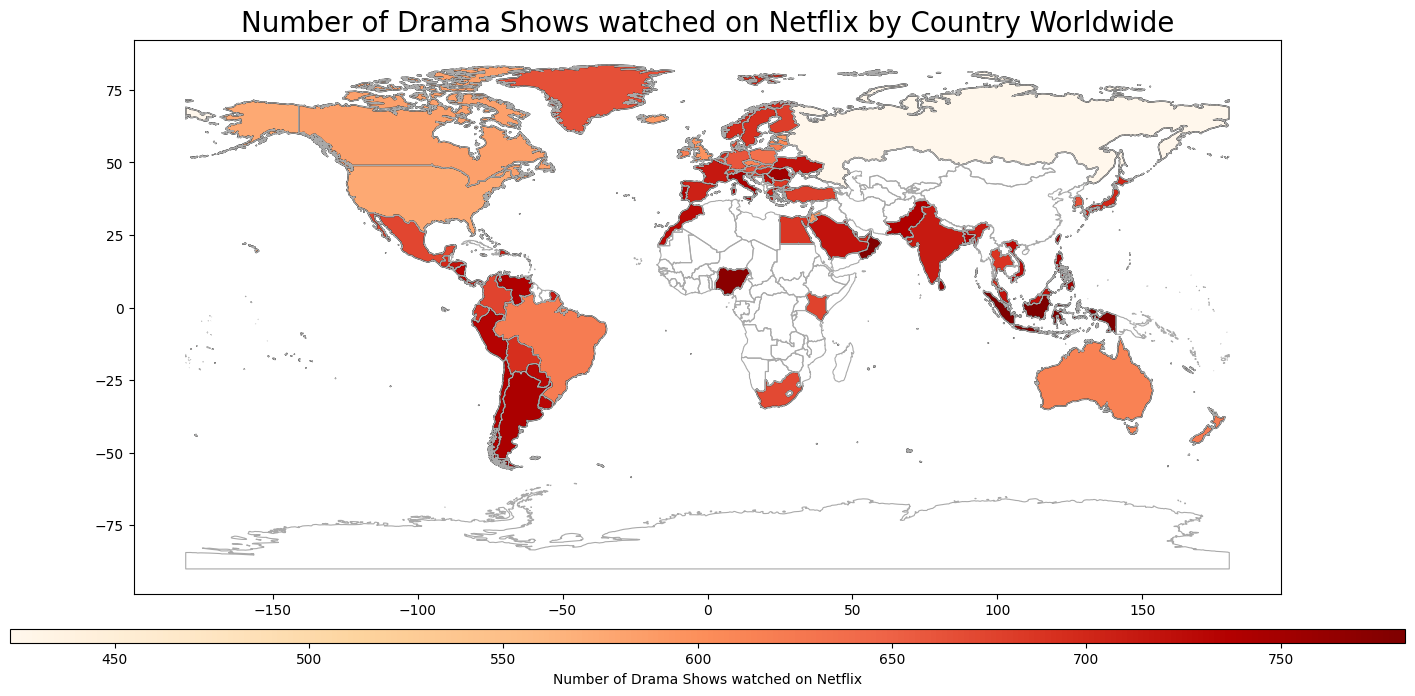

In [329]:
import geopandas as gpd
world = gpd.read_file('/Users/denyceng/CODE1161dataproject/ne_50m_admin_0_countries')

# merges the world GeoDataFrame with another DataFrame called dramatic_df. 
# The merge is done on the columns 'SOVEREIGNT' from world and 'country_name' from dramatic_df. 
# The how='left' argument means that all rows from the world dataset will be retained, and only matching rows from dramatic_df will be added
world = world.merge(dramatic_df, left_on='SOVEREIGNT', right_on='country_name', how='left') #

fig, ax = plt.subplots(1, 1, figsize=(18, 9)) #creates a Matplotlib figure (fig) and a set of axes (ax).
world.boundary.plot(ax=ax,edgecolor= 'darkgray',lw=0.8) #plots the boundaries of the geometries from GeoDataFrame on axes. This step outlines the countries borders.
world.plot(column='drama_count', #specifies the column in the GeoDataFrame to use for coloring the map. Here, it's likely a count of drama shows.
           ax=ax,
           legend=True, #adds a legend (colorbar) to the plot
           cmap='OrRd', #sets the colormap to "Orange-Red,"
           edgecolor='black',
           legend_kwds={'label': "Number of Drama Shows watched on Netflix",
                        'orientation': "horizontal",'pad':0.05, 'aspect':100, 'spacing':'proportional'}) # It sets the label of the colorbar and makes the orientation of the legend horizontal.
ax.tick_params(axis='both', labelsize=10) #sets the font size of the tick labels on X and Y axis to 45.

plt.title('Number of Drama Shows watched on Netflix by Country Worldwide',fontsize=20)
plt.show()

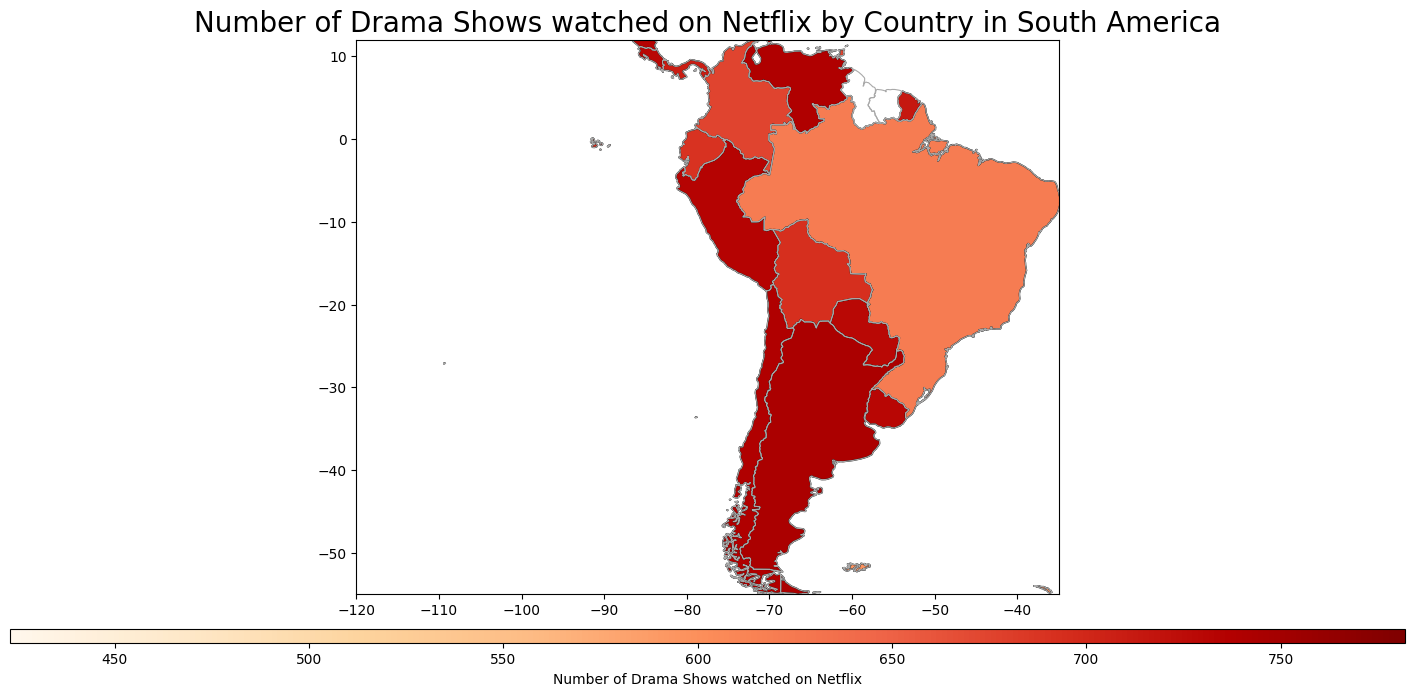

In [332]:
import geopandas as gpd
world = gpd.read_file('/Users/denyceng/CODE1161dataproject/ne_50m_admin_0_countries')

# merges the world GeoDataFrame with another DataFrame called dramatic_df. 
# The merge is done on the columns 'SOVEREIGNT' from world and 'country_name' from dramatic_df. 
# The how='left' argument means that all rows from the world dataset will be retained, and only matching rows from dramatic_df will be added
world = world.merge(dramatic_df, left_on='SOVEREIGNT', right_on='country_name', how='left') #

fig, ax = plt.subplots(1, 1, figsize=(18, 9)) #creates a Matplotlib figure (fig) and a set of axes (ax).
world.boundary.plot(ax=ax,edgecolor= 'darkgray',lw=0.8) #plots the boundaries of the geometries from GeoDataFrame on axes. This step outlines the countries borders.
world.plot(column='drama_count', #specifies the column in the GeoDataFrame to use for coloring the map. Here, it's likely a count of drama shows.
           ax=ax,
           legend=True, #adds a legend (colorbar) to the plot
           cmap='OrRd', #sets the colormap to "Orange-Red,"
           edgecolor='black',
           legend_kwds={'label': "Number of Drama Shows watched on Netflix",
                        'orientation': "horizontal",'pad':0.05, 'aspect':100, 'spacing':'proportional'}) # It sets the label of the colorbar and makes the orientation of the legend horizontal.
ax.tick_params(axis='both', labelsize=10) #sets the font size of the tick labels on X and Y axis to 45.
ax.set_ylim([-55, 12])  # Longitude range for continent
ax.set_xlim([-120, -35])
plt.title('Number of Drama Shows watched on Netflix by Country in South America',fontsize=20)
plt.show()

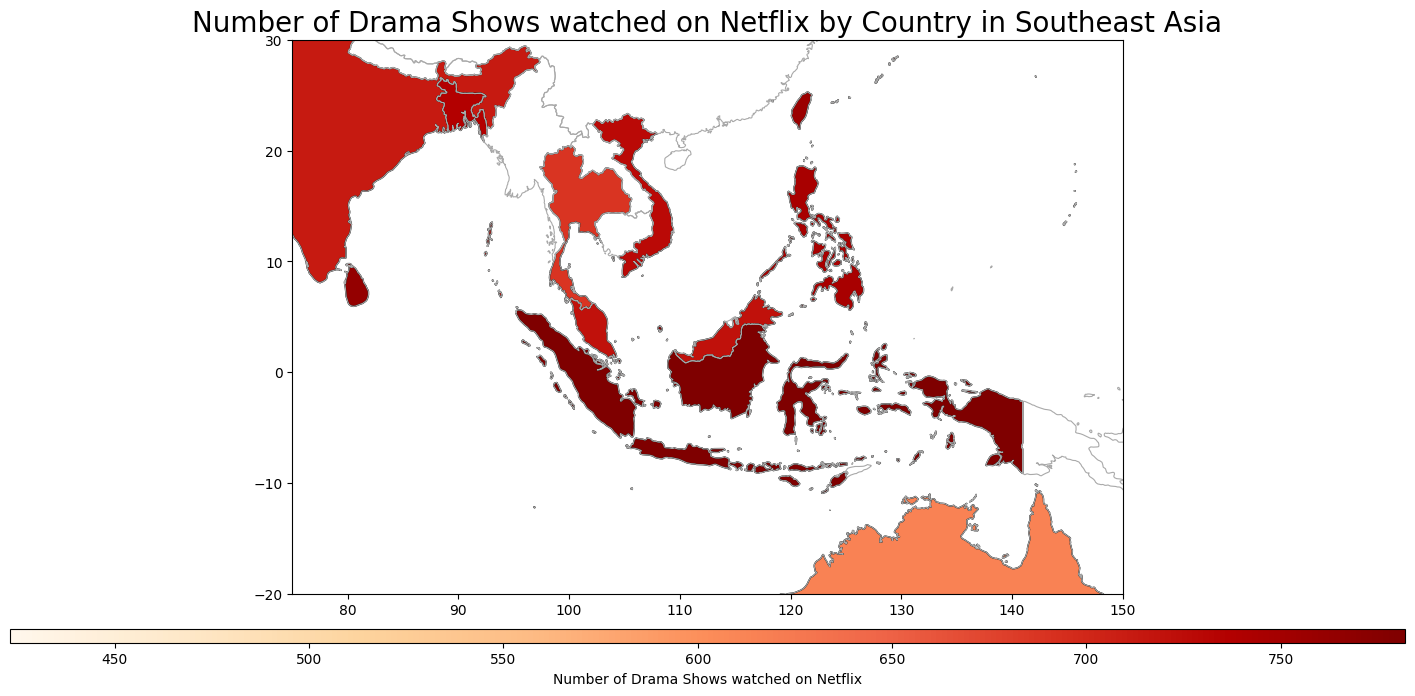

In [333]:
import geopandas as gpd
world = gpd.read_file('/Users/denyceng/CODE1161dataproject/ne_50m_admin_0_countries')

# merges the world GeoDataFrame with another DataFrame called dramatic_df. 
# The merge is done on the columns 'SOVEREIGNT' from world and 'country_name' from dramatic_df. 
# The how='left' argument means that all rows from the world dataset will be retained, and only matching rows from dramatic_df will be added
world = world.merge(dramatic_df, left_on='SOVEREIGNT', right_on='country_name', how='left') #

fig, ax = plt.subplots(1, 1, figsize=(18, 9)) #creates a Matplotlib figure (fig) and a set of axes (ax).
world.boundary.plot(ax=ax,edgecolor= 'darkgray',lw=0.8) #plots the boundaries of the geometries from GeoDataFrame on axes. This step outlines the countries borders.
world.plot(column='drama_count', #specifies the column in the GeoDataFrame to use for coloring the map. Here, it's likely a count of drama shows.
           ax=ax,
           legend=True, #adds a legend (colorbar) to the plot
           cmap='OrRd', #sets the colormap to "Orange-Red,"
           edgecolor='black',
           legend_kwds={'label': "Number of Drama Shows watched on Netflix",
                        'orientation': "horizontal",'pad':0.05, 'aspect':100, 'spacing':'proportional'}) # It sets the label of the colorbar and makes the orientation of the legend horizontal.
ax.tick_params(axis='both', labelsize=10) #sets the font size of the tick labels on X and Y axis to 45.
ax.set_xlim([75, 150])  # Longitude range for continent
ax.set_ylim([-20, 30]) #latitude range for continent
plt.title('Number of Drama Shows watched on Netflix by Country in Southeast Asia',fontsize=20)
plt.show()

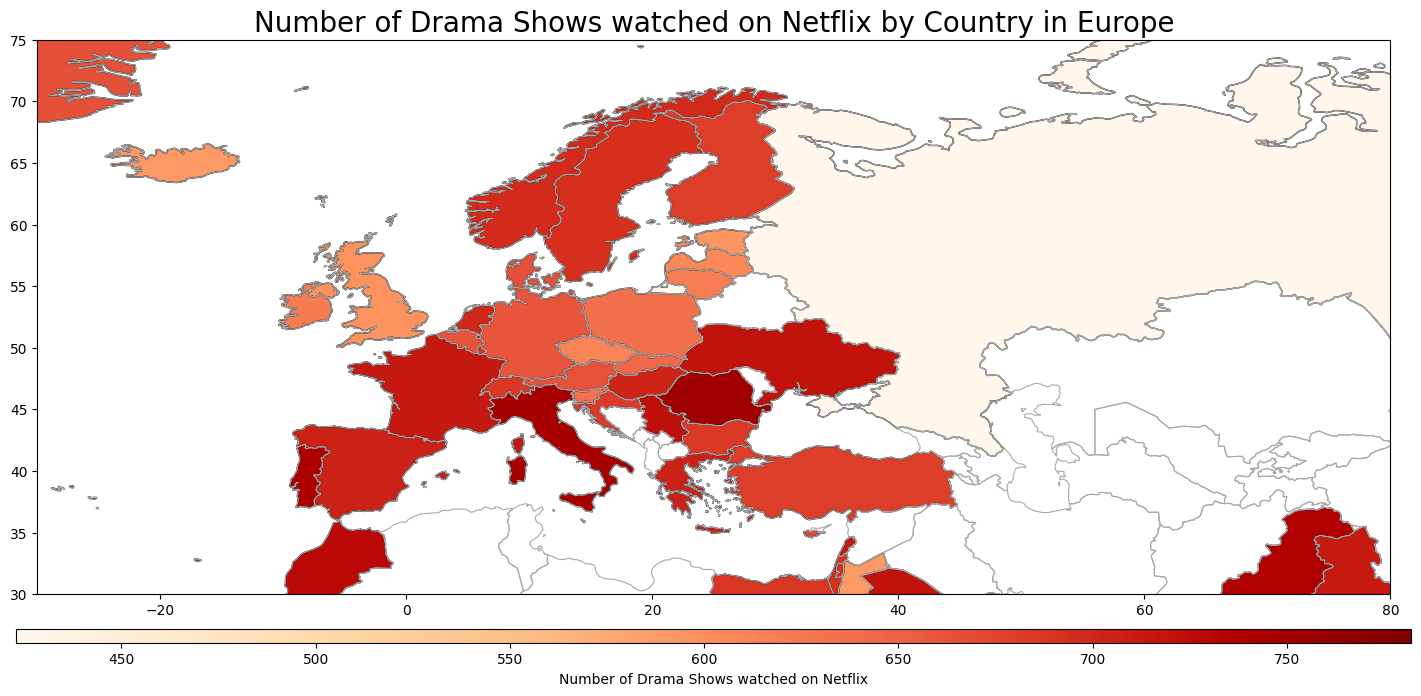

In [334]:
world = gpd.read_file('/Users/denyceng/CODE1161dataproject/ne_50m_admin_0_countries')

# merges the world GeoDataFrame with another DataFrame called dramatic_df. 
# The merge is done on the columns 'SOVEREIGNT' from world and 'country_name' from dramatic_df. 
# The how='left' argument means that all rows from the world dataset will be retained, and only matching rows from dramatic_df will be added
world = world.merge(dramatic_df, left_on='SOVEREIGNT', right_on='country_name', how='left') #

fig, ax = plt.subplots(1, 1, figsize=(18, 9)) #creates a Matplotlib figure (fig) and a set of axes (ax).
world.boundary.plot(ax=ax,edgecolor= 'darkgray',lw=0.8) #plots the boundaries of the geometries from GeoDataFrame on axes. This step outlines the countries borders.
world.plot(column='drama_count', #specifies the column in the GeoDataFrame to use for coloring the map. Here, it's likely a count of drama shows.
           ax=ax,
           legend=True, #adds a legend (colorbar) to the plot
           cmap='OrRd', #sets the colormap to "Orange-Red,"
           edgecolor='black',
           legend_kwds={'label': "Number of Drama Shows watched on Netflix",
                        'orientation': "horizontal",'pad':0.05, 'aspect':100, 'spacing':'proportional'}) # It sets the label of the colorbar and makes the orientation of the legend horizontal.
ax.tick_params(axis='both', labelsize=10) #sets the font size of the tick labels on X and Y axis to 45.
ax.set_ylim([30, 75]) 
ax.set_xlim([-30,80]) 
plt.title('Number of Drama Shows watched on Netflix by Country in Europe',fontsize=20)
plt.show()

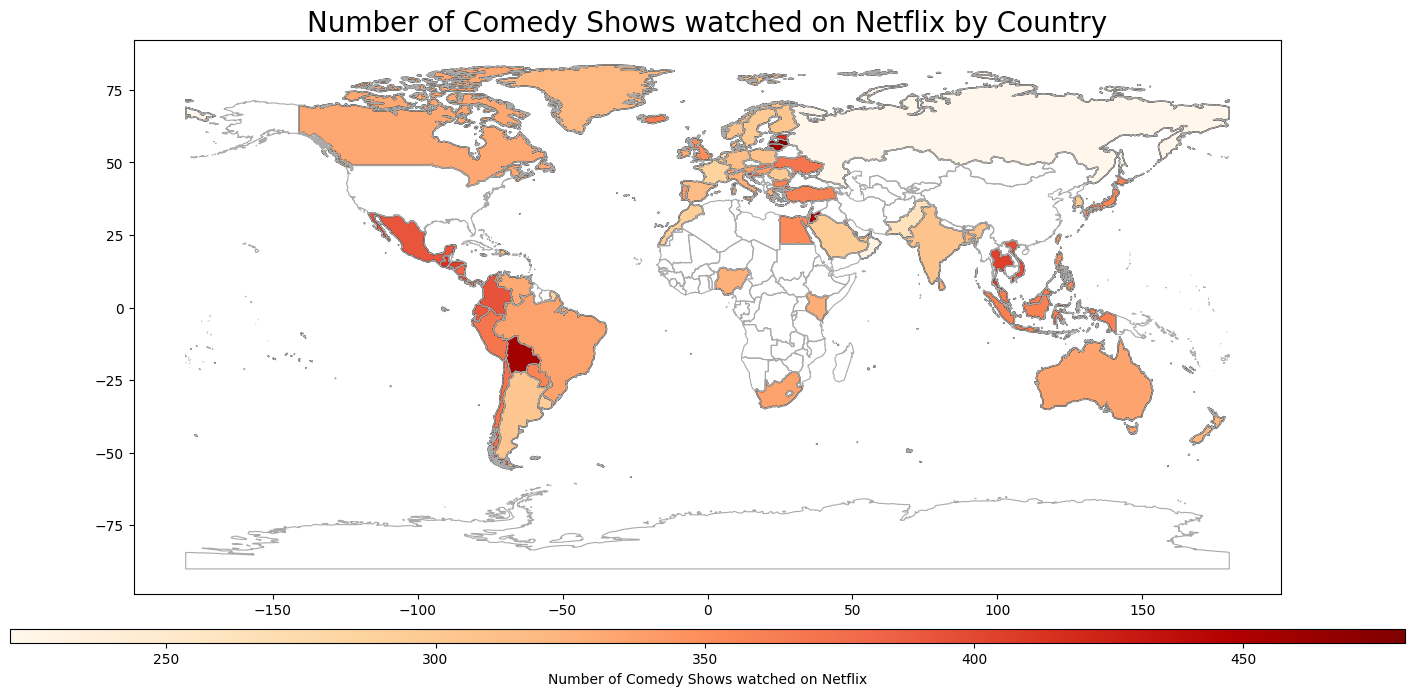

In [335]:
import geopandas as gpd
world = gpd.read_file('/Users/denyceng/CODE1161dataproject/ne_50m_admin_0_countries')

# merges the world GeoDataFrame with another DataFrame called dramatic_df. 
# The merge is done on the columns 'SOVEREIGNT' from world and 'country_name' from dramatic_df. 
# The how='left' argument means that all rows from the world dataset will be retained, and only matching rows from dramatic_df will be added
world = world.merge(funny_df, left_on='SOVEREIGNT', right_on='country_name', how='left') #

fig, ax = plt.subplots(1, 1, figsize=(18, 9)) #creates a Matplotlib figure (fig) and a set of axes (ax).
world.boundary.plot(ax=ax,edgecolor= 'darkgray',lw=0.8) #plots the boundaries of the geometries from GeoDataFrame on axes. This step outlines the countries borders.
world.plot(column='funny_count', #specifies the column in the GeoDataFrame to use for coloring the map. Here, it's likely a count of drama shows.
           ax=ax,
           legend=True, #adds a legend (colorbar) to the plot
           cmap='OrRd', #sets the colormap to "Orange-Red,"
           edgecolor='black',
           legend_kwds={'label': "Number of Comedy Shows watched on Netflix",
                        'orientation': "horizontal",'pad':0.05, 'aspect':100, 'spacing':'proportional'}) # It sets the label of the colorbar and makes the orientation of the legend horizontal.
ax.tick_params(axis='both', labelsize=10) #sets the font size of the tick labels on X and Y axis to 45.

plt.title('Number of Comedy Shows watched on Netflix by Country',fontsize=20)
plt.show()

# sample


In [305]:
row_number =0
filter_data= netflix_data[(netflix_data['country_name']=='Australia')&(netflix_data['weekly_rank']==1)]
while row_number<len(filter_data):
    show_title = filter_data.iloc[row_number][5]
    category = filter_data.iloc[row_number][3]
    genres = get_genre(show_title,category)
    print(f"Genres for '{show_title}': {genres}")
    row_number+=1

/var/folders/m6/9l2c43w54_dcl4z2zjrmxh940000gn/T/ipykernel_13575/220114679.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  show_title = filter_data.iloc[row_number][5]
/var/folders/m6/9l2c43w54_dcl4z2zjrmxh940000gn/T/ipykernel_13575/220114679.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  category = filter_data.iloc[row_number][3]


Genres for 'Day Shift': ['Action', 'Fantasy', 'Horror', 'Comedy']
Genres for 'The Sandman': ['Sci-Fi & Fantasy', 'Drama', 'Action & Adventure']
Genres for 'Let Him Go': ['Thriller', 'Crime', 'Western']
Genres for 'The Sandman': ['Sci-Fi & Fantasy', 'Drama', 'Action & Adventure']
Genres for 'Purple Hearts': ['Romance', 'Drama']
Genres for 'Keep Breathing': ['Action & Adventure']
Genres for 'The Gray Man': ['Action', 'Thriller']
Genres for 'Virgin River': ['Drama']
Genres for 'The Gray Man': ['Action', 'Thriller']
Genres for 'Virgin River': ['Drama']
Genres for 'The Sea Beast': ['Animation', 'Adventure', 'Family', 'Fantasy']
Genres for 'Stranger Things': ['Drama', 'Sci-Fi & Fantasy', 'Mystery', 'Action & Adventure']
Genres for 'Girl in the Picture': ['Documentary']
Genres for 'Stranger Things': ['Drama', 'Sci-Fi & Fantasy', 'Mystery', 'Action & Adventure']


KeyboardInterrupt: 

In [ ]:
genres_list=[]

for index, row in filter_data.iterrows():
    show_title = row['show_title']  # Adjust column name if needed
    category = row['category']     # Adjust column name if needed
    genres = get_genre(show_title, category)
    genres_list.append(genres)

filter_data['genres'] = genres_list

filter_data.to_csv('all-weeks-countries copy.csv', index=False)

/var/folders/m6/9l2c43w54_dcl4z2zjrmxh940000gn/T/ipykernel_21753/1103655318.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter_data['genres'] = genres_list


In [ ]:
new_netflix_data = pd.read_csv('all-weeks-countries copy.csv')
print('done')

done


In [ ]:
new_netflix_data.genres.value_counts()

genres
['Drama']                                                         16
['Drama', 'Sci-Fi & Fantasy', 'Mystery', 'Action & Adventure']     7
['Crime', 'Drama']                                                 6
['Action & Adventure', 'Drama', 'Mystery']                         4
['Sci-Fi & Fantasy', 'Drama', 'Action & Adventure']                4
['Action & Adventure', 'Mystery', 'Drama']                         4
['Documentary', 'Crime']                                           3
['Comedy']                                                         3
['Drama', 'Crime', 'Mystery']                                      3
['Comedy', 'Drama']                                                3
['Drama', 'Mystery', 'Sci-Fi & Fantasy']                           3
['Adventure', 'Science Fiction']                                   3
['Drama', 'Comedy']                                                3
['Drama', 'Crime']                                                 3
['Adventure', 'Fantasy']   

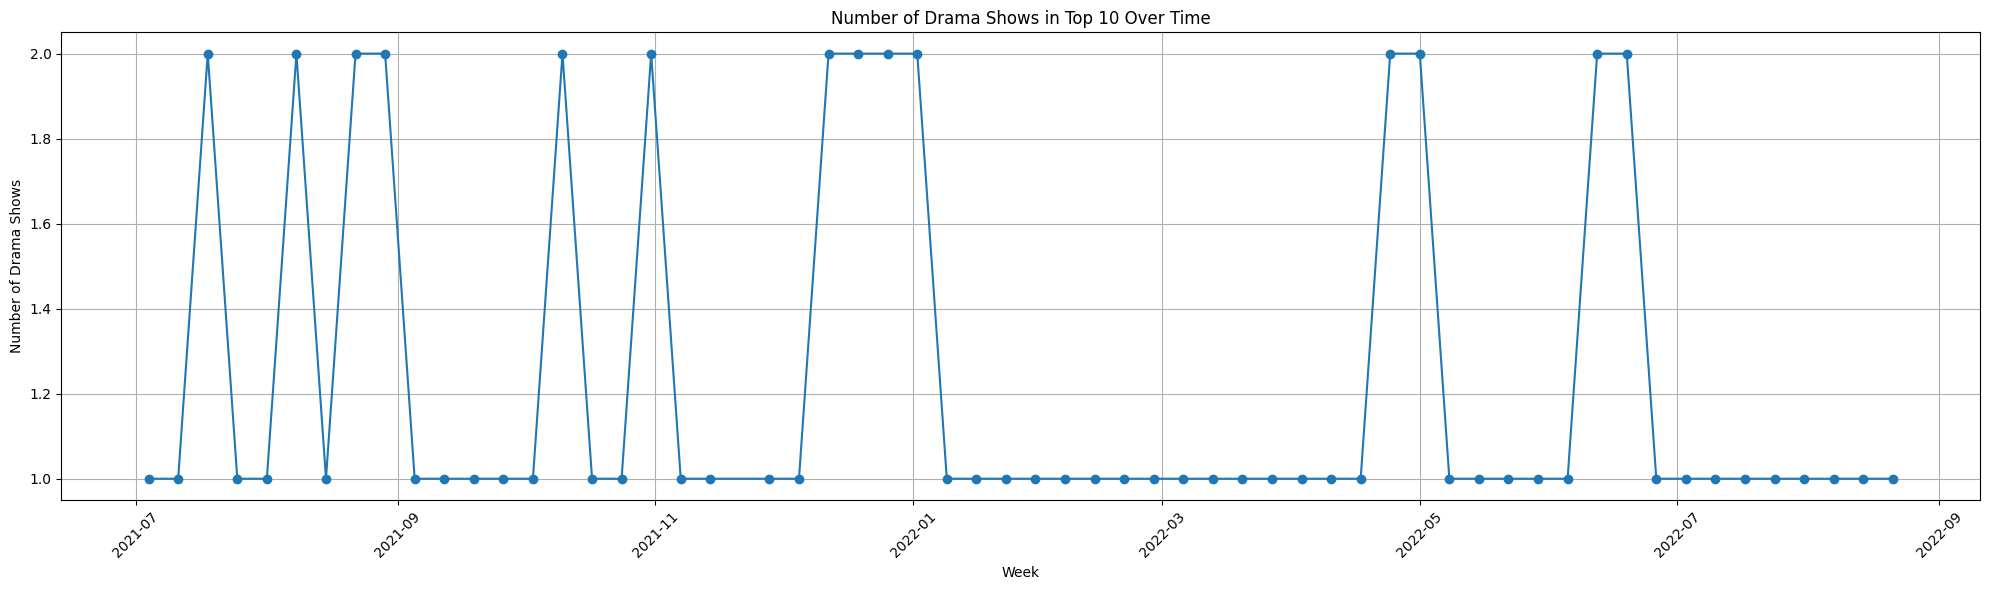

In [ ]:


# Convert 'week' to datetime
new_netflix_data['week'] = pd.to_datetime(new_netflix_data['week'])

# Ensure 'genres' is a string representation of a list
new_netflix_data['genres'] = new_netflix_data['genres'].apply(lambda x: eval(x) if isinstance(x, str) else x)

# Filter for shows with 'Drama'
df_drama = new_netflix_data[new_netflix_data['genres'].apply(lambda x: 'Drama' in x)]

# Count the number of Drama shows per week
drama_weekly_counts = df_drama.groupby('week').size()

# Plotting
plt.figure(figsize=(20, 6))
plt.plot(drama_weekly_counts.index, drama_weekly_counts.values, marker='o', linestyle='-')
plt.title('Number of Drama Shows in Top 10 Over Time')
plt.xlabel('Week')
plt.ylabel('Number of Drama Shows')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()
